In [1]:
import numpy as np
import os, sys
from glob import glob
from tqdm import tqdm
from time import time
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
import pandas as pd
import pickle as pkl
from hepstats.modeling import bayesian_blocks


def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)


def bayesian_blocks_mod(y):
    if len(np.unique(y))==1:
        return None
    tol = np.std(y)/100
    blocks = bayesian_blocks(y)
    diffs = np.diff(blocks)
    mask = np.ones(len(blocks),dtype=bool)
    for i,d in enumerate(diffs):
        if d<tol:
            print(f'Deleting one bin: width = {d}')
            mask[i] = False
    return blocks[mask,...]



In [8]:
with open('traces_v2.1_2.pkl','rb') as fh:
    chain = pkl.load(fh)
    
# ep_trace = chain[:,:,0]
# en_trace = chain[:,:,1]
# mu_trace = chain[:,:,2]
# beta_trace = chain[:,:,3] 


ep_trace = chain[0]
en_trace = chain[1]
mu_trace = chain[2]
beta_trace = chain[3]

warmup = 200

ep_trace = ep_trace[warmup:]
en_trace = en_trace[warmup:]
mu_trace = mu_trace[warmup:]
beta_trace = beta_trace[warmup:]


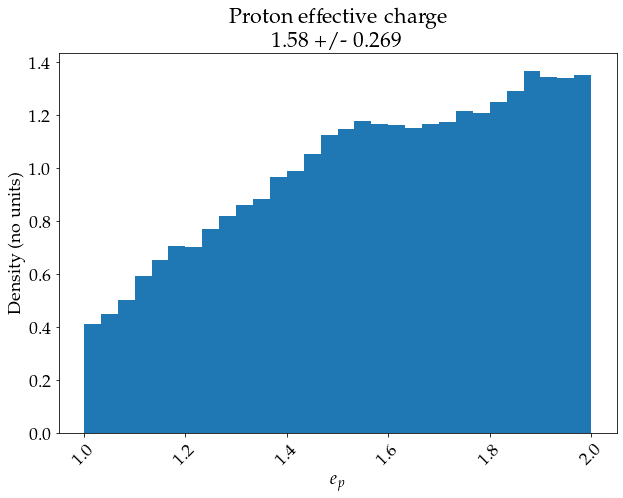

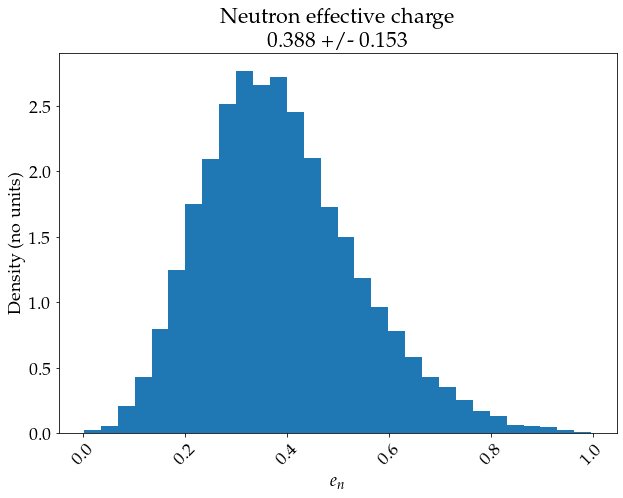

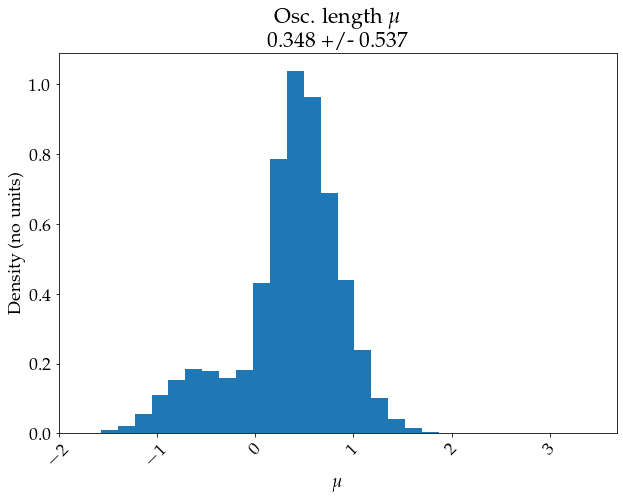

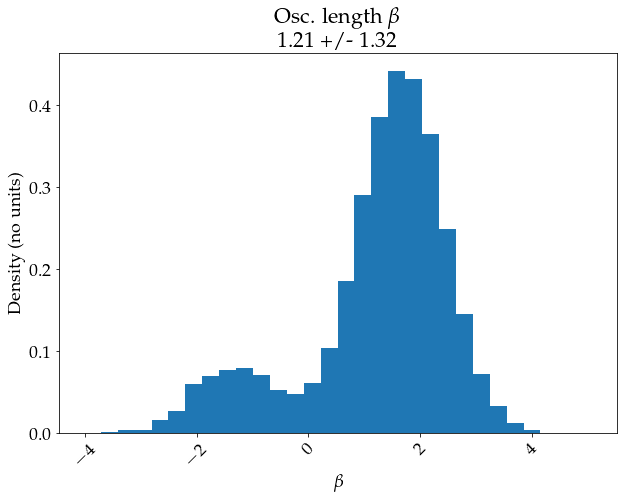

In [9]:
def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = 30
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.title(f"{title_string}\n{y_mean:5.3} +/- {y_std:5.3}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()

make_hist(ep_trace,'Proton effective charge',r'$e_p$')
make_hist(en_trace,'Neutron effective charge',r'$e_n$')
make_hist(mu_trace,r'Osc. length $\mu$',r'$\mu$')
make_hist(beta_trace,r'Osc. length $\beta$',r'$\beta$')


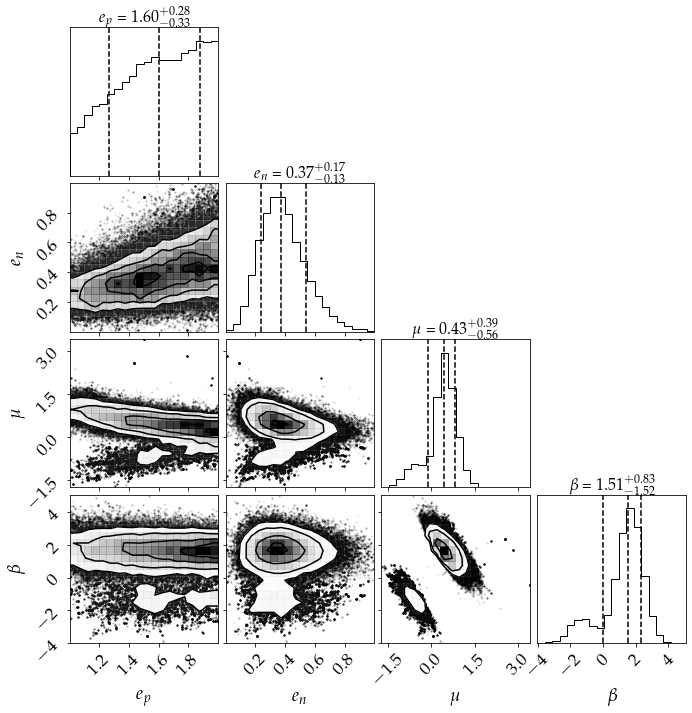

In [10]:
import corner

data = np.array([ep_trace.flatten(),en_trace.flatten(),mu_trace.flatten(),beta_trace.flatten()]).T

f = plt.figure(figsize=(10,10))
figure = corner.corner(data,
                       labels=[r'$e_p$',r'$e_n$',r'$\mu$',r'$\beta$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 16},
                      fig=f)